In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
url1 = 'https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/sharck_attack_part_2UPD.csv'#כשפיצלנו את הקובץ , לאחר הפיצול נשארו בקובץ המון שורות ריקות ולכן יצרנו משתנה חדש שבו מצויות רק שורות עם נתונים
df = pd.read_csv(url1)
shark_df2 = df.iloc[:2809]


In [147]:
url2 = 'https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/sharck_attack_part_1UPD.csv'
shark_df1 = pd.read_csv(url2)


In [148]:
shark_df = pd.concat([shark_df1 ,shark_df2]).reset_index()#כעת נחבר את הקבצים, מאחר ואנחנו רוצים לעבוד באותו סדר שבו עבדו בקובץ , נרצה שההתחלה של הקובץ יהיו השנים המעודכנות ואילו בסוף יהיו השנים המאוחרות


In [6]:
counts_of_each_activity = shark_df['Activity'].value_counts() #סידור מחדש עבור activity
frequent_activities = counts_of_each_activity[counts_of_each_activity >= 50].index
shark_df['Frequent_Activity'] = shark_df['Activity'].apply(lambda x: x if x in frequent_activities else pd.NA) # יצירת עמודה חדשה שבה מצויים כלל הפעילויות שמופיעות מעל 50 פעם בdata
shark_df['Frequent_Activity'].unique()

array([<NA>, 'Standing', 'Surfing', 'Swimming', 'Fishing', 'Scuba diving',
       'Body boarding', 'Wading', 'Snorkeling', 'Spearfishing', 'Diving',
       'Bathing'], dtype=object)

In [7]:
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Scuba diving': 'Diving','Snorkeling': 'Diving'}) #איחוד המשתנים כך שכל סוגי הצלילה ייכנסו תחת הקבוצה של הצלילה הכולל
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Spearfishing':'Fishing'})
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Body boarding':'Surfing'})

In [8]:
counts_of_species= shark_df['Species '].value_counts()
frequent_species = counts_of_species[counts_of_species >= 10].index
frequent_species

Index(['White shark', 'Shark involvement prior to death was not confirmed',
       'Invalid', 'Shark involvement not confirmed', 'Tiger shark',
       'Shark involvement prior to death unconfirmed', 'Bull shark',
       '6' shark', '4' shark', '1.8 m [6'] shark', 'Questionable incident',
       'Questionable', '1.5 m [5'] shark', '1.2 m [4'] shark', '3' shark',
       '5' shark', '2 m shark', '4' to 5' shark', '3 m [10'] shark',
       'Wobbegong shark', 'No shark involvement', '3' to 4' shark',
       '3 m shark', '2.4 m [8'] shark', '12' shark', 'Blacktip shark',
       '3.7 m [12'] shark', 'Blue shark', '1.2 m to 1.5 m [4' to 5'] shark',
       'Mako shark', '7' shark', '"a small shark"', '1.5 m shark',
       'Shark involvement prior to death not confirmed', 'Nurse shark',
       'Bronze whaler shark', '10' shark', '6 m [20'] white shark',
       'Raggedtooth shark', '5 m [16.5'] white shark', 'Zambesi shark',
       'Grey nurse shark', '4 m [13'] white shark'],
      dtype='object

In [9]:
shark_df['Species'] = shark_df['Species '].apply(lambda x: x if x in frequent_species else pd.NA)
shark_df['Species'].unique()

array(['White shark', <NA>, '2 m shark', 'Tiger shark',
       'Shark involvement not confirmed', 'Questionable', '3 m shark',
       "6' shark", 'Bull shark', 'Wobbegong shark', 'Blacktip shark',
       "5' shark", "4' to 5' shark", 'Nurse shark', "4' shark",
       'Shark involvement prior to death not confirmed', "3' shark",
       "10' shark", "3' to 4' shark", 'Invalid', 'Blue shark',
       'Mako shark', 'No shark involvement', '1.5 m shark', "7' shark",
       'Grey nurse shark', 'Raggedtooth shark', 'Zambesi shark',
       'Shark involvement prior to death was not confirmed',
       'Bronze whaler shark', '"a small shark"', "12' shark",
       "4 m [13'] white shark", "1.8 m [6'] shark",
       "6 m [20'] white shark", "3 m [10'] shark", "2.4 m [8'] shark",
       "1.2 m [4'] shark", "1.2 m to 1.5 m [4' to 5'] shark",
       "5 m [16.5'] white shark", "1.5 m [5'] shark", "3.7 m [12'] shark",
       'Questionable incident',
       'Shark involvement prior to death unconfirmed'],

In [10]:
shark_df['Species'] = shark_df['Species'].replace({'Shark involvement prior to death was not confirmed': 'Shark involvement not confirmed','Shark involvement prior to death unconfirmed': 'Shark involvement not confirmed','Shark involvement prior to death not confirmed':'Shark involvement not confirmed'}) #איחוד המשתנים כך שכל סוגי הצלילה ייכנסו תחת הקבוצה של הצלילה הכולל
shark_df['Species'] = shark_df['Species'].replace({"6 m [20'] white shark":'White shark',"5 m [16.5'] white shark":'White shark',"5 m [16.5'] white shark":"white shark","4 m [13'] white shark":"white shark","white shark":'White shark'})
shark_df['Species'] = shark_df['Species'].replace({"Questionable":"Questionable incident"})
shark_df['Species'].unique()

array(['White shark', <NA>, '2 m shark', 'Tiger shark',
       'Shark involvement not confirmed', 'Questionable incident',
       '3 m shark', "6' shark", 'Bull shark', 'Wobbegong shark',
       'Blacktip shark', "5' shark", "4' to 5' shark", 'Nurse shark',
       "4' shark", "3' shark", "10' shark", "3' to 4' shark", 'Invalid',
       'Blue shark', 'Mako shark', 'No shark involvement', '1.5 m shark',
       "7' shark", 'Grey nurse shark', 'Raggedtooth shark',
       'Zambesi shark', 'Bronze whaler shark', '"a small shark"',
       "12' shark", 'white shark', "1.8 m [6'] shark", "3 m [10'] shark",
       "2.4 m [8'] shark", "1.2 m [4'] shark",
       "1.2 m to 1.5 m [4' to 5'] shark", "1.5 m [5'] shark",
       "3.7 m [12'] shark"], dtype=object)

In [11]:
shark_df['Fatal (Y/N)'] = shark_df['Fatal (Y/N)'].replace({"N":" N","y":"Y"})
shark_df['Fatal (Y/N)']

0         N
1         N
2         N
3         N
4         N
       ... 
6304    NaN
6305    NaN
6306    NaN
6307    NaN
6308    NaN
Name: Fatal (Y/N), Length: 6309, dtype: object

In [12]:
counts_of_fatal_incident = shark_df["Fatal (Y/N)"].value_counts()
fatal_incident = counts_of_fatal_incident[counts_of_fatal_incident >= 10].index
fatal_incident
shark_df['fatal_incident'] = shark_df['Fatal (Y/N)'].apply(lambda x: x if x in fatal_incident else pd.NA)
shark_df['fatal_incident'].unique()

array([' N', 'Y', <NA>, 'UNKNOWN'], dtype=object)

In [13]:
shark_df['Sex '] = shark_df['Sex '].replace('M ', 'M')
s={'M':'M','F':'F'}
shark_df['Sex'] = shark_df['Sex '].map(s)


In [14]:
shark_df['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [15]:
top_15 = shark_df['Country'].value_counts().head(15)
shark_df['Top_Country'] = shark_df['Country'].apply(lambda x: x if x in top_15.index else None)


In [16]:
shark_df['Top_Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', None, 'SOUTH AFRICA',
       'BAHAMAS', 'NEW CALEDONIA', 'CUBA', 'NEW ZEALAND', 'REUNION',
       'PHILIPPINES', 'MOZAMBIQUE', 'FIJI', 'ITALY', 'PAPUA NEW GUINEA'],
      dtype=object)

In [17]:
shark_df['D_Time'] = shark_df['Time'].str.replace('h', ':', regex=False)
shark_df['D_Time'] = pd.to_datetime(shark_df['D_Time'], format='%H:%M', errors='coerce')
shark_df['Time_Category'] = pd.cut(shark_df['D_Time'].dt.hour, bins=[0, 12, 18, 24], labels=['Morning', 'Noon', 'evening'], right=False)
shark_df['Time_Category'] .unique()

['evening', NaN, 'Morning', 'Noon']
Categories (3, object): ['Morning' < 'Noon' < 'evening']

In [18]:
shark_df['Injury_M'] = shark_df['Injury'].apply(lambda x: 'bite' if pd.notnull(x) and 'bit' in x else x)
shark_df['Injury_M'] = shark_df['Injury_M'].apply(lambda x: 'No injury' if pd.notnull(x) and 'No injury' in x else x)
top_Injury= shark_df['Injury_M'].value_counts().head(20).index
shark_df['Top_Injury'] = shark_df['Injury_M'].apply(lambda x: x if x in top_Injury else 'NON')
shark_df['Top_Injury'].unique()

array(['No injury', 'NON', 'bite', 'FATAL', 'Lacerations to left foot',
       'Minor injuries', 'Lacerations to right foot',
       'Lacerations to foot', 'Leg injured', 'Laceration to left foot',
       'Lacerations to right hand', 'Lacerations to leg', 'Minor injury',
       'No details', 'Leg severed', 'Survived', 'Foot severed',
       'Foot lacerated', 'FATAL, leg severed ',
       'FATAL, body not recovered', 'Leg lacerated'], dtype=object)

In [19]:
shark_df['Top_Injury'].value_counts()

Top_Injury
NON                          2819
bite                         1802
FATAL                         802
No injury                     517
Survived                       97
No details                     43
FATAL, body not recovered      24
Minor injury                   22
Foot lacerated                 21
Lacerations to foot            20
Lacerations to left foot       18
Lacerations to right foot      18
Minor injuries                 14
Leg injured                    13
Foot severed                   13
Leg lacerated                  12
Leg severed                    12
Lacerations to leg             11
FATAL, leg severed             11
Laceration to left foot        10
Lacerations to right hand      10
Name: count, dtype: int64

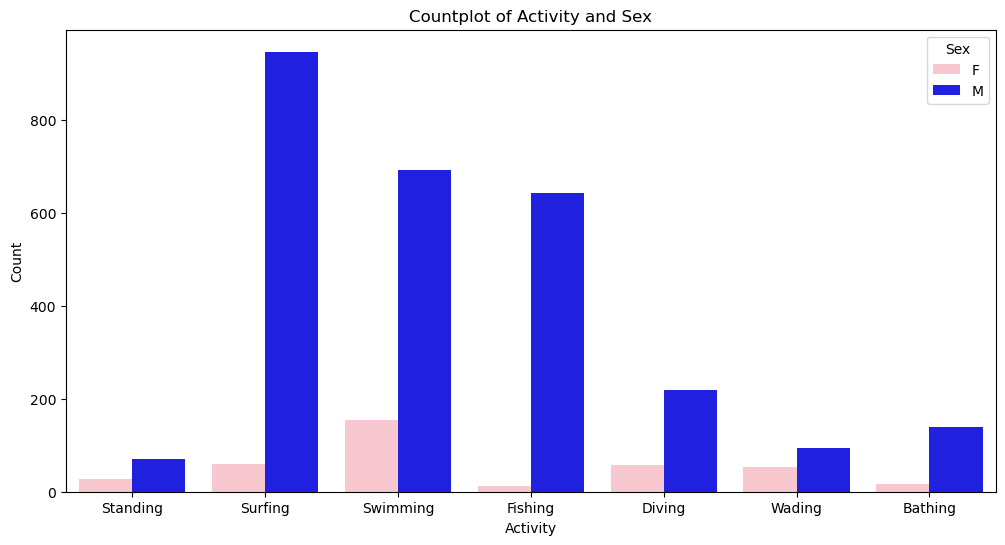

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Frequent_Activity', hue='Sex', data=shark_df ,palette={'M': 'blue', 'F': 'pink'})
plt.title('Countplot of Activity and Sex')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

In [21]:
shark_df.columns

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23', 'Frequent_Activity', 'Species',
       'fatal_incident', 'Sex', 'Top_Country', 'D_Time', 'Time_Category',
       'Injury_M', 'Top_Injury'],
      dtype='object')

In [22]:
shark_df = shark_df[pd.to_numeric(shark_df['Year'], errors='coerce').notnull()]
# המרת העמודה של השנים לפורמט תאריך ובחירת 10 השנים האחרונות
shark_df['Year'] = pd.to_datetime(shark_df['Year'], format='%Y')

# בחירת 10 השנים האחרונות
last_10_years = shark_df['Year'].dt.year.max() - 9
recent_years = shark_df[shark_df['Year'].dt.year >= last_10_years]
recent_years


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1642-01-01 00:00:00, at position 236. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

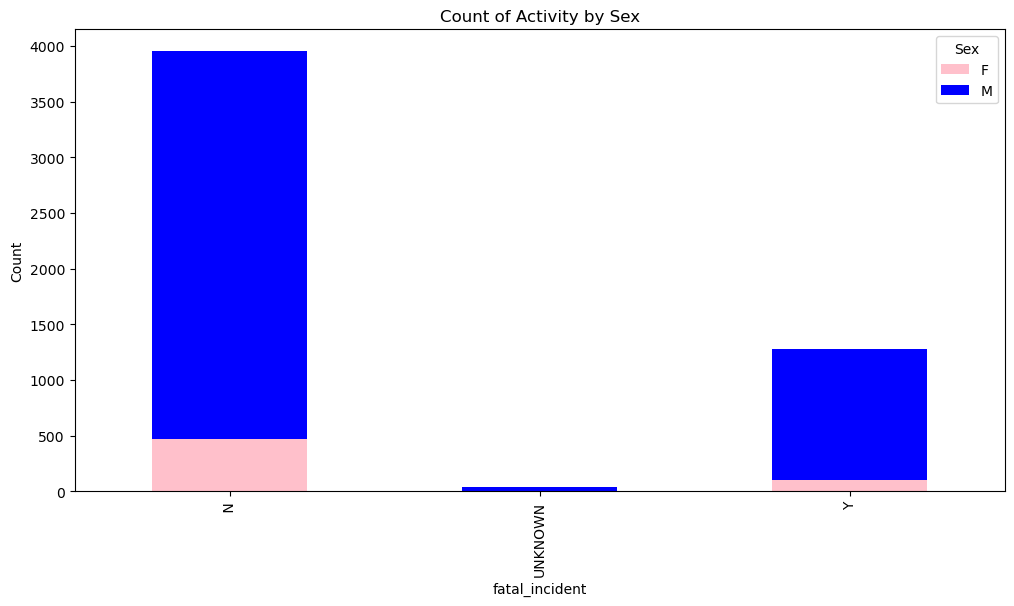

In [24]:
pivot_table = shark_df.pivot_table(index='fatal_incident', columns='Sex', aggfunc='size', fill_value=0)

# יצירת barplot מתוך טבלת הציר
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6),color=['pink', 'blue'])
plt.title('Count of Activity by Sex')
plt.xlabel('fatal_incident')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Top_Country', ylabel='fatal_incident'>

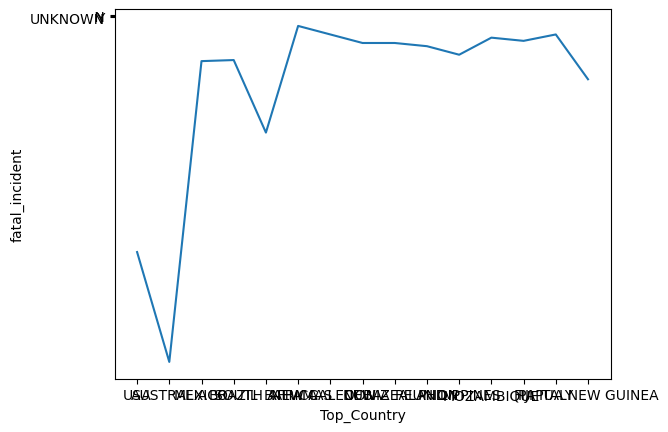

In [25]:
sns.lineplot(x="Top_Country", y="fatal_incident",  data=shark_df,errorbar=None, estimator = sum)

In [26]:
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')

C:\Users\Ohad\AppData\Local\Temp\ipykernel_10808\2121271910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')


In [27]:
sns.boxplot(x="frequent_species", y="Age",  data=shark_df)
plt.title('Check the frequency of a shark attacking each age')
plt.xlabel('frequent_species')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


ValueError: Could not interpret input 'frequent_species'

In [28]:
shark_df['age_bins'] = pd.cut(shark_df['Age'], bins = 3, labels = ('young', 'middle_age', 'old' ))
#חיצירת עמודה חדשה המחלקת את הגילאים ל3 תתי קבוצות

C:\Users\Ohad\AppData\Local\Temp\ipykernel_10808\894480280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df['age_bins'] = pd.cut(shark_df['Age'], bins = 3, labels = ('young', 'middle_age', 'old' ))


In [29]:
shark_df['fatal_incident'] = shark_df['fatal_incident'].map({'Y': 1, 'N': 0}) #הפיכת הנתונים שמצויים בfatal_incident ל0 ו1
shark_df['fatal_incident']

C:\Users\Ohad\AppData\Local\Temp\ipykernel_10808\3444134594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df['fatal_incident'] = shark_df['fatal_incident'].map({'Y': 1, 'N': 0}) #הפיכת הנתונים שמצויים בfatal_incident ל0 ו1


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
6297    1.0
6298    1.0
6299    1.0
6300    1.0
6301    1.0
Name: fatal_incident, Length: 6300, dtype: float64

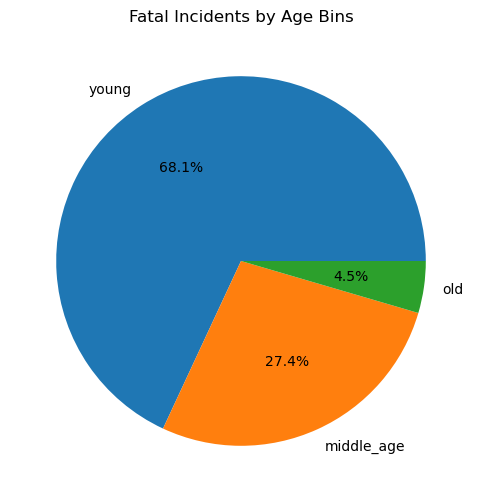

In [30]:
fatal_sum_by_age_bins = shark_df.groupby(['age_bins'])['fatal_incident'].sum()

# יצירת גרף pie plot
plt.figure(figsize=(10, 6))
fatal_sum_by_age_bins.plot(kind='pie', autopct='%1.1f%%')
plt.title('Fatal Incidents by Age Bins')
plt.ylabel('')  # הסרת תווית ציר ה-Y
plt.show()

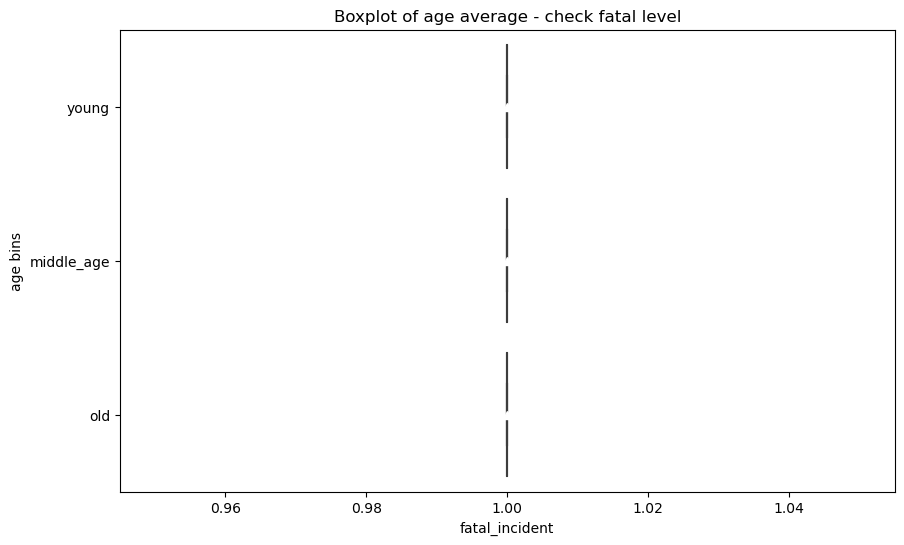

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fatal_incident', y='age_bins', data=shark_df, showmeans=True,
            meanprops={'marker' : '^', 'markerfacecolor':'white', 'markeredgecolor':'white'}, meanline=False)

# Set labels and title
plt.xlabel('fatal_incident')
plt.ylabel('age bins')
plt.title('Boxplot of age average - check fatal level')

# Show the plot
plt.show()

In [32]:
# יצירת countplot של 'frequent_species' מחולק לפי 'fatal_incident' ומתעלם מערכים חסרים
plt.figure(figsize=(6, 10))
palette_colors = {'young': 'pink', 'middle_age': 'black', 'old': 'yellow'}
sns.histplot(data=shark_df, x='frequent_species', hue='age_bins',palette = palette_colors)
plt.title('Countplot of Frequent Species by Fatal Incident')
plt.xlabel('Frequent Species')
plt.ylabel('Count')
plt.legend(title='Fatal Incident')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `frequent_species` for parameter `x`

<Figure size 600x1000 with 0 Axes>

In [33]:
shark_df.columns

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23', 'Frequent_Activity', 'Species',
       'fatal_incident', 'Sex', 'Top_Country', 'D_Time', 'Time_Category',
       'Injury_M', 'Top_Injury', 'age_bins'],
      dtype='object')

In [34]:
sex_counts = shark_df['Sex'].value_counts()
print(sex_counts)

# המרת עמודת "Age" לערכים מספריים
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')

# סיכום סטטיסטי של גיל לפי מגדר
age_by_sex = shark_df.groupby('Sex')['Age'].describe()
print(age_by_sex)

Sex
M    5094
F     637
Name: count, dtype: int64
      count       mean        std  min   25%   50%   75%   max
Sex                                                           
F     443.0  26.860045  16.431079  1.0  14.0  21.0  38.0  77.0
M    2892.0  27.484440  13.495048  1.0  17.0  24.0  35.0  87.0


C:\Users\Ohad\AppData\Local\Temp\ipykernel_10808\2374331032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')


In [36]:
shark_df['Date'] = pd.to_datetime(shark_df['Date'], errors='coerce')
shark_df['Month'] = shark_df['Date'].dt.month
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
shark_df['Month'] = shark_df['Month'].map(month_map)


C:\Users\Ohad\AppData\Local\Temp\ipykernel_10808\1232737782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df['Date'] = pd.to_datetime(shark_df['Date'], errors='coerce')
C:\Users\Ohad\AppData\Local\Temp\ipykernel_10808\1232737782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df['Month'] = shark_df['Date'].dt.month
C:\Users\Ohad\AppData\Local\Temp\ipykernel_10808\1232737782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

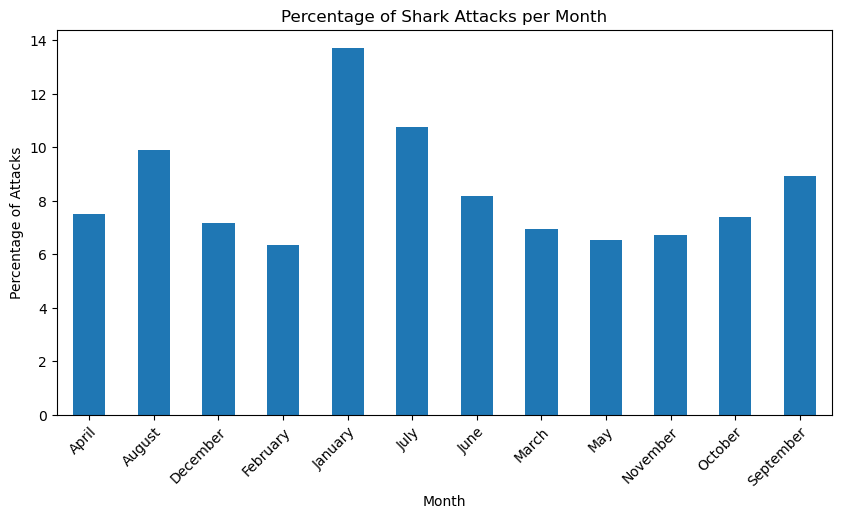

In [37]:

attacks_per_month = shark_df['Month'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(10, 5))
attacks_per_month.plot(kind='bar')
plt.title('Percentage of Shark Attacks per Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.show()


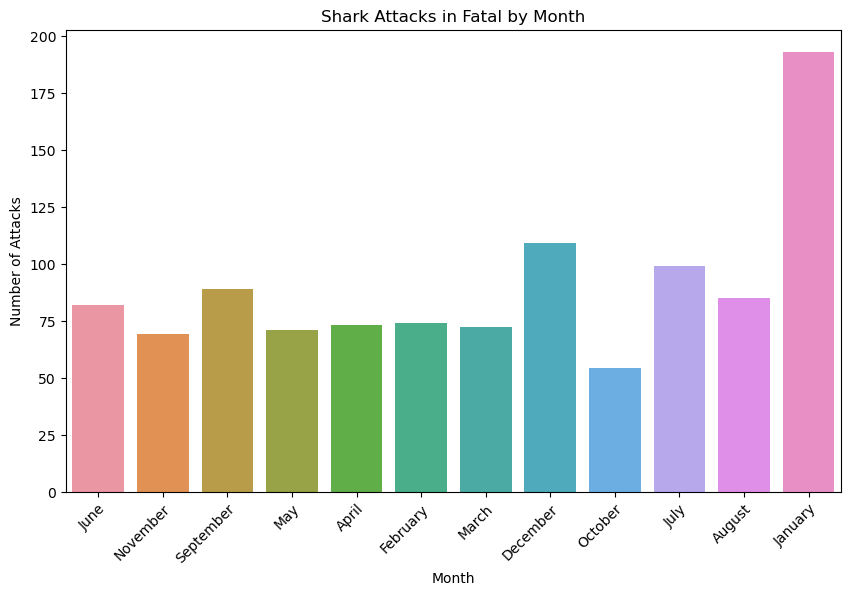

In [38]:
filtered_data = shark_df[shark_df['Fatal (Y/N)']== 'Y']

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Month', ax=ax)

# כותרות לצירים ולגרף
ax.set_title('Shark Attacks in Fatal by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
# הצגת הגרף
plt.show()

In [39]:
shark_df['Top_Country'].value_counts()

Top_Country
USA                 2229
AUSTRALIA           1337
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
Name: count, dtype: int64

In [40]:
shark_df['Location'].value_counts()

Location
New Smyrna Beach, Volusia County                  163
Daytona Beach, Volusia County                      30
Ponce Inlet, Volusia County                        20
Melbourne Beach, Brevard County                    18
Myrtle Beach, Horry County                         17
                                                 ... 
Whale Beach                                         1
l'Anse-Vata                                         1
Hole-in-the Wall                                    1
Wreck of the Navy Barge, 22 miles SE of Rudee       1
Below the English fort, Trincomalee                 1
Name: count, Length: 4108, dtype: int64

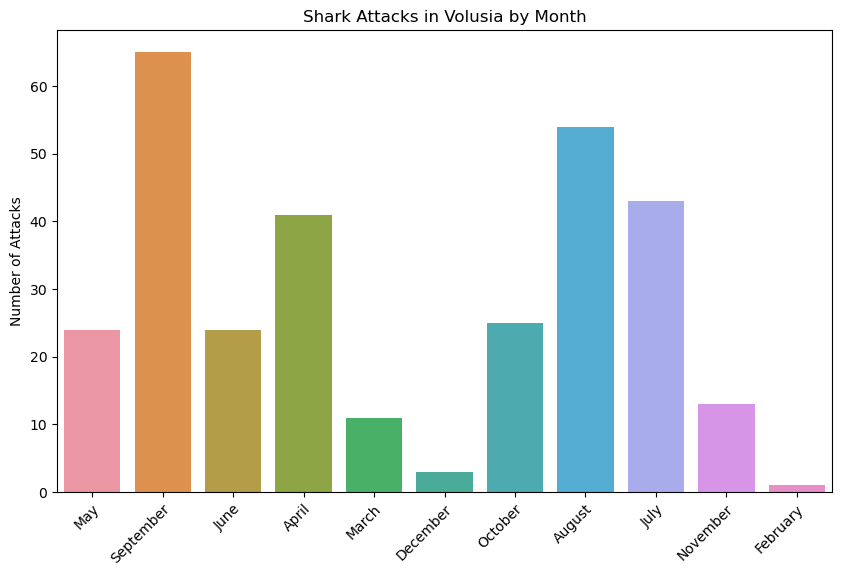

In [41]:
filtered_data = shark_df[shark_df['Location'].str.contains('Volusia', na=False)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Month', ax=ax)

# כותרות לצירים ולגרף
ax.set_title('Shark Attacks in Volusia by Month')
ax.set_xlabel('')
ax.set_ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor' )
# הצגת הגרף
plt.show()

In [60]:
january_attacks = shark_df[shark_df['Month'] == 'January']
attacks_by_country = january_attacks['Top_Country'].value_counts()
print(attacks_by_country)

Top_Country
AUSTRALIA           215
SOUTH AFRICA        122
USA                 106
PAPUA NEW GUINEA     37
NEW ZEALAND          31
MOZAMBIQUE           13
CUBA                 12
BRAZIL                9
REUNION               9
FIJI                  8
NEW CALEDONIA         7
MEXICO                7
BAHAMAS               4
ITALY                 4
PHILIPPINES           2
Name: count, dtype: int64


In [ ]:
def plot_attacks_by_country_in_month(shark_df, Month):
    month_data = data[data['חודש'] == month]
    country_attacks = month_data.groupby('מדינה')['סוג התקיפה'].value_counts().unstack().fillna(0)
    country_attacks.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title(f"תקיפות כרישים בפנדה בחודש {month}")
    plt.xlabel('מדינה')
    plt.ylabel('מספר תקיפות')
    plt.show()

# הפעל את הפונקציה לפי חודש ספציפי
plot_attacks_by_country_in_month(data, 'ינואר')  # החלף 'ינואר' בחודש שתרצה

In [137]:
S = shark_df[(shark_df['Top_Country']== 'AUSTRALIA')  & (shark_df['Month'] == 1)]
k= S['Top_Injury'].value_counts()

# Calculate percentages
#attack_types_percent = (attack_types / attack_types.sum()) * 100
print(k)


Top_Injury
NON                          89
bite                         66
No injury                    29
FATAL                        17
Survived                      7
No details                    2
FATAL, body not recovered     1
Minor injuries                1
Leg severed                   1
Lacerations to leg            1
FATAL, leg severed            1
Name: count, dtype: int64


In [132]:
shark_df['Top_Country'].value_counts()

Top_Country
USA                 2229
AUSTRALIA           1337
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
Name: count, dtype: int64

In [114]:
shark_df.columns

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23', 'Frequent_Activity', 'Species',
       'fatal_incident', 'Sex', 'Top_Country', 'D_Time', 'Time_Category',
       'Injury_M', 'Top_Injury', 'age_bins', 'Month'],
      dtype='object')

In [ ]:
# Number of fatal and non-fatal attacks by gender
fatal_attacks_by_gender = shark_df.groupby(['Sex', 'Fatal (Y/N)']).size().unstack()

# Plot the data
fatal_attacks_by_gender.plot(kind='bar', stacked=True)
plt.title('Fatal vs Non-Fatal Shark Attacks by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Attacks')
plt.show()

# Number of fatal and non-fatal attacks by age group
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')
shark_df['Age_Group'] = pd.cut(shark_df['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

fatal_attacks_by_age =shark_df.groupby(['Age_Group', 'Fatal (Y/N)']).size().unstack()

# Plot the data
fatal_attacks_by_age.plot(kind='bar', stacked=True)
plt.title('Fatal vs Non-Fatal Shark Attacks by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Attacks')
plt.show()


In [ ]:
# Calculate percentage of fatal and non-fatal attacks by gender
total_attacks_by_gender = shark_df.groupby('Sex').size()
fatal_attacks_by_gender_percent = (fatal_attacks_by_gender.div(total_attacks_by_gender, axis=0) * 100).fillna(0)

# Plot the data
fatal_attacks_by_gender_percent.plot(kind='bar', stacked=True)
plt.title('Percentage of Fatal vs Non-Fatal Shark Attacks by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Attacks')
plt.show()

# Calculate percentage of fatal and non-fatal attacks by age group
total_attacks_by_age_group = shark_df.groupby('Age_Group').size()
fatal_attacks_by_age_percent = (fatal_attacks_by_age.div(total_attacks_by_age_group, axis=0) * 100).fillna(0)

# Plot the data
fatal_attacks_by_age_percent.plot(kind='bar', stacked=True)
plt.title('Percentage of Fatal vs Non-Fatal Shark Attacks by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Attacks')
plt.show()


In [ ]:
filtered_df = shark_df.dropna(subset=['Activity', 'Top_Injury'])

# צמצום מספר הקטגוריות למספר קטן יותר להצגה ברורה יותר
top_activities = filtered_df['Activity'].value_counts().index[:10]
filtered_df = filtered_df[filtered_df['Activity'].isin(top_activities)]

# יצירת גרף
plt.figure(figsize=(14, 10))
sns.countplot(data=filtered_df, x='Top_Injury', hue='Activity')

plt.title('Activity vs Injury Count Plot')
plt.xlabel('Count')
plt.ylabel('Activity')
plt.legend(title='Injury', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
filtered_df = shark_df.dropna(subset=['Activity', 'Top_Injury'])

# צמצום מספר הקטגוריות למספר קטן יותר להצגה ברורה יותר
top_activities = filtered_df['Activity'].value_counts().index[:10]
filtered_df = filtered_df[filtered_df['Activity'].isin(top_activities)]

# חישוב אחוזים
activity_injury_counts = filtered_df.groupby(['Activity', 'Top_Injury']).size().reset_index(name='count')
activity_totals = activity_injury_counts.groupby('Activity')['count'].sum().reset_index(name='total')
activity_injury_counts = pd.merge(activity_injury_counts, activity_totals, on='Activity')
activity_injury_counts['percentage'] = (activity_injury_counts['count'] / activity_injury_counts['total']) * 100

# יצירת גרף
plt.figure(figsize=(14, 10))
sns.barplot(data=activity_injury_counts, x='Activity', y='percentage', hue='Top_Injury')

plt.title('Percentage of Injuries by Activity')
plt.xlabel('Percentage')
plt.ylabel('Activity')
plt.legend(title='Injury', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [130]:
shark_df['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [144]:
#shark_df['Fatal'] = shark_df[(shark_df['Fatal (Y/N)']==' N') & (shark_df['Fatal (Y/N)']=='Y')]
shark_df['Fatal'] = np.where(shark_df['Fatal (Y/N)'].isin(['Y']), 'Yes', 'No')
shark_df['Fatal'].value_counts()

C:\Users\Ohad\AppData\Local\Temp\ipykernel_10808\1672400067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df['Fatal'] = np.where(shark_df['Fatal (Y/N)'].isin(['Y']), 'Yes', 'No')


Fatal
No     4912
Yes    1388
Name: count, dtype: int64

In [100]:
TY = shark_df[shark_df['Year']> 1950]
shark_df['Top_Year'] = TY['Year'] 
shark_df['Top_Year'].value_counts()


C:\Users\Ohad\AppData\Local\Temp\ipykernel_10808\3601048245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_df['Top_Year'] = TY['Year']


Top_Year
2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1971.0     28
1973.0     27
1977.0     26
1979.0     25
1978.0     25
Name: count, Length: 68, dtype: int64

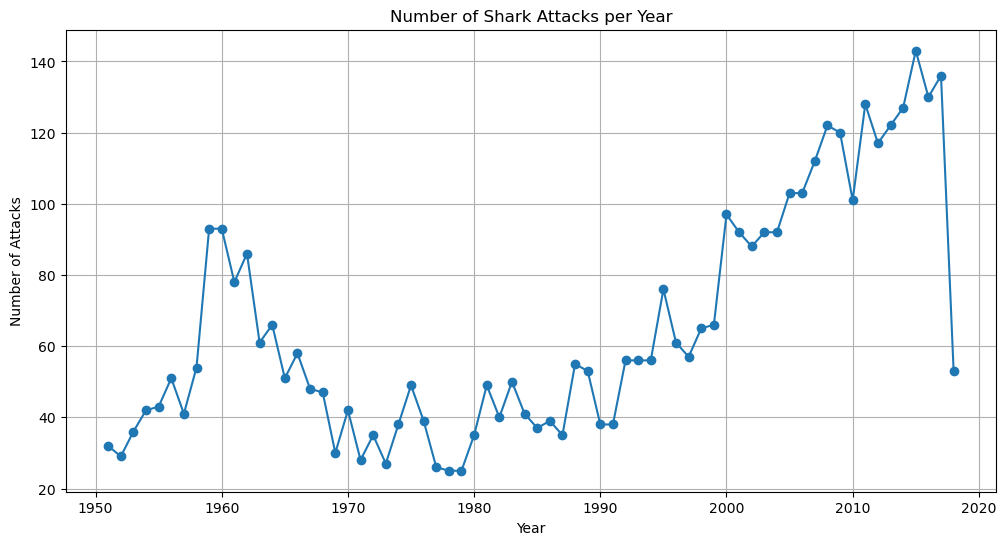

In [101]:
attack_counts = shark_df['Top_Year'].value_counts().sort_index()

# יצירת גרף
plt.figure(figsize=(12, 6))
plt.plot(attack_counts.index, attack_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Shark Attacks per Year')
plt.grid(True)
plt.show()

In [145]:
AY = shark_df[shark_df['Fatal']== 'Y']
AY

KeyError: "None of [Index([      'USA',       'USA',       'USA', 'AUSTRALIA',    'MEXICO',\n       'AUSTRALIA',    'BRAZIL',       'USA',       'USA',       'USA',\n       ...\n             'USA', 'AUSTRALIA', 'AUSTRALIA', 'AUSTRALIA', 'AUSTRALIA',\n       'AUSTRALIA', 'AUSTRALIA',       'USA',        None,        None],\n      dtype='object', length=6300)] are in the [columns]"

In [ ]:
index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23', 'Frequent_Activity', 'Species',
       'fatal_incident', 'Sex', 'Top_Country', 'D_Time', 'Time_Category',
       'Injury_M', 'Top_Injury', 'age_bins', 'Month'],
      dtype='object')